<a href="https://colab.research.google.com/github/peachonali/Course-AI-and-Machine-Learning/blob/main/Tower%20of%20Hanoi%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ให้นักศึกษาเขียนโปรแกรมภาษา Python เพื่อแก้ปัญหา Tower of Hanoi และแสดงผลการทำงานของโปรแกรมบนหน้าจอ ดังต่อไปนี้

In [ ]:
def tower_of_hanoi(num, source, aux, target):
                  # ซ้าย กลาง ขวา
    """
    num (int): Number of disks.
    source (str): The name of the source tower.
    aux (str): The name of the auxiliary tower.
    target (str): The name of the target tower.
    """
    if num == 1:
        print(f"Move disk 1 from {source} to {target}")
        return
    # Move num-1 diks from source to auxiliary
                  # ซ้าย ขวา กลาง
    tower_of_hanoi(num - 1, source, target, aux)
    print(f"Move disk {num} from {source} to {target}")
    # Move the num-1 disks from auxiliary to tartet
                  # กลาง ซ้าย ขวา
    tower_of_hanoi(num - 1, aux, source, target)

# Example usage
num_disks = 5
tower_of_hanoi(num_disks, "A", "B", "C")

Move disk 1 from A to C
Move disk 2 from A to B
Move disk 1 from C to B
Move disk 3 from A to C
Move disk 1 from B to A
Move disk 2 from B to C
Move disk 1 from A to C
Move disk 4 from A to B
Move disk 1 from C to B
Move disk 2 from C to A
Move disk 1 from B to A
Move disk 3 from C to B
Move disk 1 from A to C
Move disk 2 from A to B
Move disk 1 from C to B
Move disk 5 from A to C
Move disk 1 from B to A
Move disk 2 from B to C
Move disk 1 from A to C
Move disk 3 from B to A
Move disk 1 from C to B
Move disk 2 from C to A
Move disk 1 from B to A
Move disk 4 from B to C
Move disk 1 from A to C
Move disk 2 from A to B
Move disk 1 from C to B
Move disk 3 from A to C
Move disk 1 from B to A
Move disk 2 from B to C
Move disk 1 from A to C


# 2. จากโปรแกรมในข้อ 1 ให้ นศ ปรับปรุงโปรแกรมดังกล่าวให้แสดงจำนวนครั้งที่มีการเคลื่อนย้าย disk โดยเป็นการนับจริงไม่ใช้การคำนวณจากสูตร และผู้เล่นสามารถป้อนค่า N ซึ่งหมายถึงจำนวน disk ได้ แต่ถ้าผู้ใช้ไม่ป้อนค่า N ให้โปรแกรมทำงานโดยใช้ค่า default N เท่ากับ 5 และมีเงื่อนไขเพิ่มเติมคือถ้า N มากกว่า 5 ให้แสดงเฉพาะจำนวนครั้งที่มีการเคลื่อนย้าย disk โดยไม่ต้องแสดงรายละเอียดการย้าย

In [ ]:
move_count = 0

def tower_of_hanoi(num, source, aux, target, verbose=True):
    global move_count
    if num == 1:
        move_count += 1
        if verbose:
            print(f"Move disk 1 from {source} to {target}")
        return

    tower_of_hanoi(num - 1, source, target, aux, verbose)

    move_count += 1
    if verbose:
        print(f"Move disk {num} from {source} to {target}")

    tower_of_hanoi(num - 1, aux, source, target, verbose)

# ส่วนรับค่า N
user_input = input("Enter number of disks (N) [Default=5]: ")
if user_input.strip() == "":
    n = 5
else:
    n = int(user_input)

# เงื่อนไขการแสดงผล
show_details = True
if n > 5:
    show_details = False

move_count = 0 # Reset counter
tower_of_hanoi(n, "A", "B", "C", verbose=show_details)

print(f"\nTotal moves: {move_count}")

Enter number of disks (N) [Default=5]: 3
Move disk 1 from A to C
Move disk 2 from A to B
Move disk 1 from C to B
Move disk 3 from A to C
Move disk 1 from B to A
Move disk 2 from B to C
Move disk 1 from A to C

Total moves: 7


# 3. จากโปรแกรมในข้อ 2 ให้ นศ ปรับปรุงโปรแกรมดังกล่าวให้มีการจับเวลาเมื่อเรียกฟังก์ชันในการแก่ปัญหา Tower of Hanoi และแสดงผลเวลาดังกล่าวทางหน้าจอ จากนั้นให้นักศึกษาทดลองป้อนค่า N เป็น 1 จนถึง 32 และนำค่าเวลาดังกล่าวไป Plot กราฟเส้นแสดงให้เห็นถึงเวลาที่ประมวลผล (แกน y) เปรียบเทียบกับจำนวน N ที่ทดลอง (แกน x)

In [ ]:
import time

def tower_of_hanoi(num, source, aux, target, verbose=True):
    global move_count
    if num == 1:
        move_count += 1
        if verbose:
            print(f"Move disk 1 from {source} to {target}")
        return

    tower_of_hanoi(num - 1, source, target, aux, verbose)
    move_count += 1
    if verbose:
        print(f"Move disk {num} from {source} to {target}")
    tower_of_hanoi(num - 1, aux, source, target, verbose)

n_values = []
execution_times = []

print("Starting execution time measurement for N = 1 to 32...")
for n in range(1, 33):
    move_count = 0
    start_time = time.time()
    # verbose=False for performance and to satisfy constraints for N > 5
    tower_of_hanoi(n, "A", "B", "C", verbose=False)
    end_time = time.time()

    elapsed_time = end_time - start_time
    n_values.append(n)
    execution_times.append(elapsed_time)

    print(f"N={n}: {elapsed_time:.6f} seconds (Moves: {move_count})")

    # Safety break: N=32 takes ~4.2 billion moves, which might take a very long time.
    # However, following instructions to iterate to 32.

print("Measurement complete.")

Starting execution time measurement for N = 1 to 32...
N=1: 0.000003 seconds (Moves: 1)
N=2: 0.000004 seconds (Moves: 3)
N=3: 0.000004 seconds (Moves: 7)
N=4: 0.000004 seconds (Moves: 15)
N=5: 0.000008 seconds (Moves: 31)
N=6: 0.000013 seconds (Moves: 63)
N=7: 0.000025 seconds (Moves: 127)
N=8: 0.000940 seconds (Moves: 255)
N=9: 0.000151 seconds (Moves: 511)
N=10: 0.000242 seconds (Moves: 1023)
N=11: 0.000514 seconds (Moves: 2047)
N=12: 0.005524 seconds (Moves: 4095)
N=13: 0.003824 seconds (Moves: 8191)
N=14: 0.007180 seconds (Moves: 16383)
N=15: 0.021291 seconds (Moves: 32767)
N=16: 0.045183 seconds (Moves: 65535)
N=17: 0.131587 seconds (Moves: 131071)
N=18: 0.146870 seconds (Moves: 262143)
N=19: 0.141839 seconds (Moves: 524287)
N=20: 0.289472 seconds (Moves: 1048575)
N=21: 0.605722 seconds (Moves: 2097151)
N=22: 1.153224 seconds (Moves: 4194303)
N=23: 1.642794 seconds (Moves: 8388607)
N=24: 2.451339 seconds (Moves: 16777215)
N=25: 4.864442 seconds (Moves: 33554431)
N=26: 11.314898 se

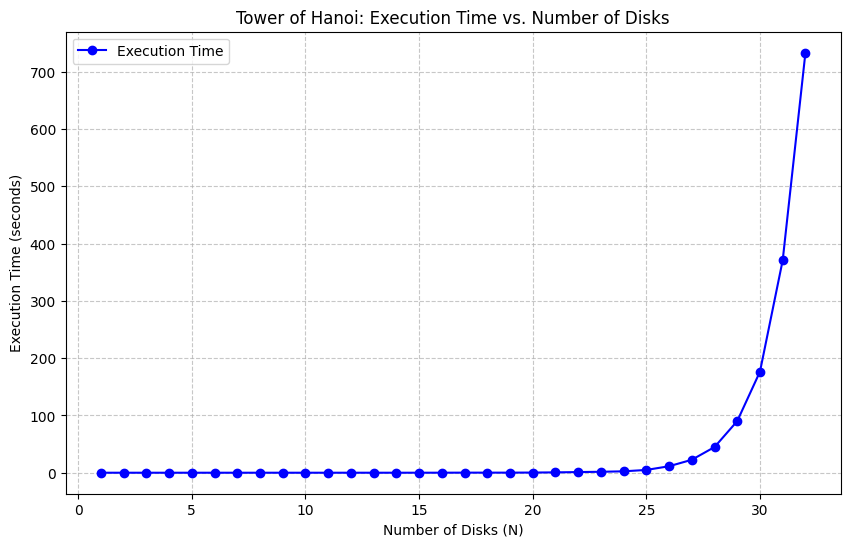

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, execution_times, marker='o', linestyle='-', color='b', label='Execution Time')

# Set labels and title
plt.xlabel('Number of Disks (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Tower of Hanoi: Execution Time vs. Number of Disks')

# Add grid and legend
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()